### Validation and cleaning of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
colors = ['#1565c0', '#862C92', '#00BCD4', '#2196f3','#64b5f6', '#bbdefb', '#004173']
sns.set_palette(colors)

In [3]:
income_expenditure_df = pd.read_csv('Income-Expenditure.csv')
dietary_habits_df = pd.read_csv('Dietary Habits Survey Data.csv')
food_description_df = pd.read_csv('Food_Prices_Dimension_Table.csv')
food_prices_df = pd.read_csv('Food Prices.csv')

#### Income and expenditure dataframe

In [4]:
income_expenditure_df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [5]:
income_expenditure_df.shape

(50, 7)

In [6]:
income_expenditure_df.dtypes

Mthly_HH_Income              int64
Mthly_HH_Expense             int64
No_of_Fly_Members            int64
Emi_or_Rent_Amt              int64
Annual_HH_Income             int64
Highest_Qualified_Member    object
No_of_Earning_Members        int64
dtype: object

In [7]:
income_expenditure_df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [8]:
income_expenditure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [9]:
income_expenditure_df.isna().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

#### Dietary habits dataframe

In [10]:
dietary_habits_df.head()

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN


In [11]:
dietary_habits_df.shape

(78, 27)

In [ ]:
dietary_habits_df.dtypes

In [ ]:
dietary_habits_df.columns

In [14]:
dietary_habits_df.describe()

,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),How many times a week do you order-in or go out to eat?,
count,78.000000,78.000000,0.0
mean,3.128205,1.897436,NaN
std,0.651850,1.223044,NaN
min,2.000000,1.000000,NaN
25%,3.000000,1.000000,NaN
50%,3.000000,1.500000,NaN
75%,3.000000,2.000000,NaN
max,5.000000,7.000000,NaN


In [ ]:
dietary_habits_df.isna().sum()

In [16]:
dietary_habits_df = dietary_habits_df.drop(columns=[' '])

In [17]:
for col in ['Age','Gender',
'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)',
'What would best describe your diet:']:
    print("--------------------------------")
    print(dietary_habits_df[col].value_counts())

--------------------------------
Age
18-24       49
Under 18    15
45-54        8
Above 65     3
35-44        3
Name: count, dtype: int64
--------------------------------
Gender
Male      40
Female    38
Name: count, dtype: int64
--------------------------------
How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)
3    50
4    16
2    10
5     2
Name: count, dtype: int64
--------------------------------
What would best describe your diet:
Non-Vegetarian                                                                  29
Vegetarian (No egg or meat)                                                     22
Eggetarian (Vegetarian who consumes egg and egg products)                       15
Pollotarian (Vegetarian who consumes poultry and white meat but no red meat)     6
Pescatarian (Vegetarian who consumes only seafood)                               3
Pollo-pescetarian (Vegetarian who consumes seafood and w

In [18]:
for col_2 in ['Choose all that apply: [I skip meals]',
                'Choose all that apply: [I experience feelings of hunger during the day]',
                'Choose all that apply: [I consult a nutritionist/dietician]',
                'Choose all that apply: [I cook my own meals]',
                'What would you consider to be the main meal of YOUR day?',
                'What does your diet mostly consist of and how is it prepared?']:
        print("------------------------------------------")
        print(dietary_habits_df[col_2].value_counts())

------------------------------------------
Choose all that apply: [I skip meals]
Rarely             31
Sometimes          23
Never              14
Often               8
Very frequently     2
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I experience feelings of hunger during the day]
Sometimes          32
Often              19
Rarely             17
Never               6
Very frequently     4
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I consult a nutritionist/dietician]
Never        63
Rarely       12
Sometimes     2
Often         1
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I cook my own meals]
Sometimes          20
Rarely             19
Never              15
Very frequently    15
Often               9
Name: count, dtype: int64
------------------------------------------
What would you consider to be the main meal of YOUR day?
Lunch        44

In [19]:
for col_3 in ['How many times a week do you order-in or go out to eat?',
              'Are you allergic to any of the following? (Tick all that apply)']:
       print("------------------------------------------") 
       print(dietary_habits_df[col_3].value_counts())

------------------------------------------
How many times a week do you order-in or go out to eat?
1    39
2    22
3     9
4     4
5     3
7     1
Name: count, dtype: int64
------------------------------------------
Are you allergic to any of the following? (Tick all that apply)
I do not have any allergies    68
Milk                            2
Onion                           1
Curd                            1
Leafy Vegetables                1
Peanuts and Tree Nuts           1
Fish                            1
Deep Fried Food                 1
Corn                            1
Shellfish, Eggplant             1
Name: count, dtype: int64


In [20]:
for col_4 in ['What is your weekly food intake frequency of the following food categories: [Sweet foods]',
              'What is your weekly food intake frequency of the following food categories: [Salty foods]',
              'What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
              'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
              'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
              'What is your weekly food intake frequency of the following food categories: [Meat]',
              'What is your weekly food intake frequency of the following food categories: [Seafood ]']:
       print("------------------------------------------") 
       print(dietary_habits_df[col_4].value_counts())

------------------------------------------
What is your weekly food intake frequency of the following food categories: [Sweet foods]
Few times a week       31
Once a day             21
Once a month           13
Several times a day     6
Never                   4
Often                   1
Less often              1
In every meal           1
Name: count, dtype: int64
------------------------------------------
What is your weekly food intake frequency of the following food categories: [Salty foods]
Few times a week       25
Several times a day    17
Once a day             17
In every meal          11
Once a month            4
Never                   3
Often                   1
Name: count, dtype: int64
------------------------------------------
What is your weekly food intake frequency of the following food categories: [Fresh fruit]
Once a day             34
Several times a day    16
Few times a week       13
In every meal           8
Once a month            4
Less often              2
Nev

In [21]:
for col_5 in ['How frequently do you consume these beverages [Tea]',
                'How frequently do you consume these beverages [Coffee]',
                'How frequently do you consume these beverages [Aerated (Soft) Drinks]',
                'How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)]',
                'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
                'How frequently do you consume these beverages [Alcoholic Beverages]',
                'What is your water consumption like (in a day, 1 cup=250ml approx)']:
        print("------------------------------------------") 
        print(dietary_habits_df[col_5].value_counts())

------------------------------------------
How frequently do you consume these beverages [Tea]
Never                  31
Once a day             23
Once a month           11
Few times a week       10
Several times a day     2
Less often              1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Coffee]
Never                  21
Few times a week       20
Once a day             17
Once a month           14
Several times a day     5
Less often              1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Aerated (Soft) Drinks]
Once a month        33
Never               23
Few times a week    17
Once a day           3
Often                1
Less often           1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)]
Few times a week       28
Once a month       

#### Food description dataframe

In [22]:
food_description_df.head(10)

,EFPG_code,EFPG_name,Tier 1 group,Tier 2 group
0,10000,Whole-grain breads,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
1,10025,Whole-grain rice and pasta,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
2,10050,Whole-grain breakfast grains,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
3,10075,"Whole-grain flour, bread mixes, and frozen dough",Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
4,15000,Non-whole-grain breads,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
5,15025,Non-whole-grain rice and pasta,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
6,15050,Non-whole-grain breakfast grains,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
7,15075,"Non-whole-grain flour, bread mixes, and frozen...",Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
8,20000,"Potatoes, fresh",Vegetables,Potatoes
9,20075,"Potatoes, canned",Vegetables,Potatoes


In [23]:
food_description_df.shape

(90, 4)

In [24]:
food_description_df.dtypes

EFPG_code        int64
EFPG_name       object
Tier 1 group    object
Tier 2 group    object
dtype: object

In [25]:
duplicate_code = food_description_df.duplicated(subset='EFPG_code', keep=False)
food_description_df[duplicate_code]

,EFPG_code,EFPG_name,Tier 1 group,Tier 2 group
57,54550,Nut and seed butters and spreads,Meat and Protein Foods,"Nuts, nut butters, and seeds"
58,54550,"Bacon, sausage, and lunch meats",Meat and Protein Foods,"Bacon, sausage, and lunch meats"


In [26]:
food_description_df.isna().sum()

EFPG_code       0
EFPG_name       0
Tier 1 group    0
Tier 2 group    0
dtype: int64

In [27]:
for col_food in ['Tier 1 group']:
    print(f"Names of foods group 1: {food_description_df[col_food].unique()}")
    print("------------------------------------------------")
    print(f"Number of diferent foods group 1: {food_description_df[col_food].nunique()}")

Names of foods group 1: ['Grains' 'Vegetables' 'Fruit' 'Dairy' 'Meat and Protein Foods'
 'Prepared meals, sides, and salads' 'Other foods']
------------------------------------------------
Number of diferent foods group 1: 7


In [28]:
for col_food in ['Tier 2 group']:
    print(f"Names of foods group 2: {food_description_df[col_food].unique()}")
    print("-------------------------------------------------")
    print(f"Number of diferent foods group 2: {food_description_df[col_food].nunique()}")

Names of foods group 2: ['Whole-grain breads, cereal, rice, pasta, and flours'
 'Non-whole-grain breads, cereal, rice, pasta, and flours' 'Potatoes'
 'Other starchy vegetables' 'Tomatoes' 'Other red and orange vegetables'
 'Dark green' 'Beans, lentils, peas, and legumes' 'Other/mixed vegetables'
 'Whole fruit' '100% fruit and vegetable juices'
 'Whole milk, yogurt, and cream'
 'Reduced-fat, low-fat, and skim milk, cream, and yogurt' 'Cheese'
 'Beef, pork, lamb, veal and game' 'Chicken, turkey, and game birds'
 'Fish and seafood' 'Nuts, nut butters, and seeds'
 'Bacon, sausage, and lunch meats' 'Egg and egg substitutes'
 'Tofu and meat substitutes' 'Ready-to-eat foods'
 'Frozen/refrigerated ready-to-heat foods'
 'Shelf-stable ready-to-heat foods and soups' 'Shelf-stable meal kits'
 'Fats, oils, and salad dressings'
 'Gravies, sauces, condiments, and spices' 'Beverages'
 'Desserts, sweets, and candies' 'Breakfast cereals' 'Savory snacks'
 'Vitamins and meal supplements' 'Baby food' 'Infa

#### Food prices dataframe

In [29]:
food_prices_df.head()

,Year,Month,EFPG_code,Metroregion_code,Attribute,Value
0,2012,1,10000,National,Total weighted monthly sales in U.S. dollars,2.493734e+08
1,2012,1,10000,National,Total weighted monthly quantities in grams,4.875195e+10
2,2012,1,10000,National,Total unweighted monthly sales in U.S. dollars,1.629852e+08
3,2012,1,10000,National,Total unweighted monthly quantities in grams,3.217558e+10
4,2012,1,10000,National,Number of stores in geographic area,4.178100e+04


In [30]:
food_prices_df.shape

(1020600, 6)

In [31]:
food_prices_df.dtypes

Year                  int64
Month                 int64
EFPG_code             int64
Metroregion_code     object
Attribute            object
Value               float64
dtype: object

In [32]:
food_prices_df.isna().sum()

Year                0
Month               0
EFPG_code           0
Metroregion_code    0
Attribute           0
Value               0
dtype: int64

In [33]:
for col_food_price in ['Year', 'Month','Metroregion_code','Attribute']:
    print("-------------------------------------")
    print(food_prices_df[col_food_price].unique())

-------------------------------------
[2012 2013 2014 2015 2016 2017 2018]
-------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
-------------------------------------
['National' 'Census Region 1: Northeast' 'Census Region 2: Midwest'
 'Census Region 3: South' 'Census Region 4: West'
 'Atlanta-Sandy Springs-Roswell, GA' 'Boston-Cambridge-Newton, MA-NH'
 'Chicago-Naperville-Elgin, IL-IN-WI' 'Dallas-Fort Worth-Arlington, TX'
 'Detroit-Warren-Dearborn, MI' 'Houston-The Woodlands-Sugar Land, TX'
 'Los Angeles-Long Beach-Anaheim, CA'
 'Miami-Fort Lauderdale-West Palm Beach, FL'
 'New York-Newark-Jersey City, NY-NJ-PA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD' '0' '1' '2' '3' '4']
-------------------------------------
['Total weighted monthly sales in U.S. dollars'
 'Total weighted monthly quantities in grams'
 'Total unweighted monthly sales in U.S. dollars'
 'Total unweighted monthly quantities in grams '
 'Number of stores in geographic area'
 'Weighted mean uni

In [34]:
food_prices_df['Value'].describe()

count    1.020600e+06
mean     4.452703e+09
std      4.794131e+10
min      4.560000e-05
25%      5.754512e-01
50%      1.109000e+03
75%      5.160352e+07
max      3.340000e+12
Name: Value, dtype: float64

### Analysis

##### Income vs Healthy and Unhealthy habits

In [35]:
survey_data = dietary_habits_df.copy()

In [36]:
# Organizing columns
healthy_columns = ['What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
                'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
                'What is your weekly food intake frequency of the following food categories: [Seafood ]']

unhealthy_columns = ['How frequently do you consume these beverages [Aerated (Soft) Drinks]',
                'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
                'How frequently do you consume these beverages [Alcoholic Beverages]',
                'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
                'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
                'What is your weekly food intake frequency of the following food categories: [Salty foods]']

In [37]:
# Turning categorical responses into numbers
def responses_frecuency(values):
    frecuencies = {
        'Never': 0,
        'Less often': 1,
        'Once a month': 2,
        'Few times a week': 3,
        'Once a day': 4,
        'Often': 5,
        'Several times a day': 6,
        'In every meal': 7,
        'With every meal': 7}
    return frecuencies.get(values, None)

for column_change in healthy_columns + unhealthy_columns:
    survey_data[column_change] = survey_data[column_change].map(responses_frecuency)

In [38]:
# Creating indexes
survey_data['Healthy_eating_score'] = survey_data[healthy_columns].sum(axis=1)
survey_data['Unhealthy_eating_score'] = survey_data[unhealthy_columns].sum(axis=1)

In [39]:
survey_data[['Age','Healthy_eating_score', 'Unhealthy_eating_score']].head(10)

,Age,Healthy_eating_score,Unhealthy_eating_score
0,18-24,10,8
1,18-24,6,25
2,45-54,19,15
3,18-24,16,16
4,18-24,11,17
5,18-24,9,18
6,18-24,14,10
7,Above 65,17,20
8,Above 65,11,19
9,Under 18,13,19


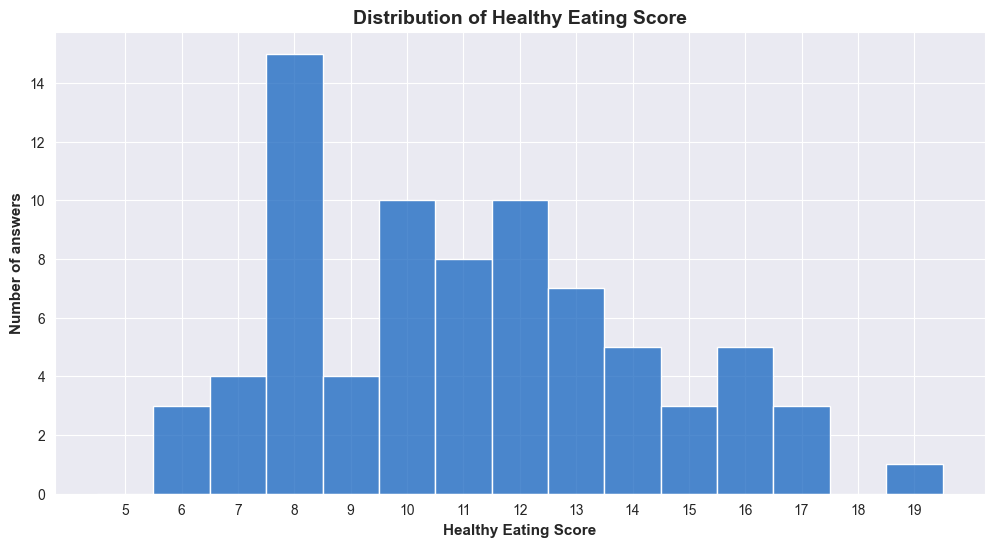

In [40]:
max_score_healthy = survey_data['Healthy_eating_score'].max()
plt.figure(figsize=(12,6))
sns.histplot(data=survey_data, x='Healthy_eating_score', bins=np.arange(5, max_score_healthy +2)-0.5, kde=False)
plt.title("Distribution of Healthy Eating Score", fontsize=14, weight="bold")
plt.xlabel("Healthy Eating Score", fontsize=11, weight="bold")
plt.xticks(range(5, max_score_healthy +1))
plt.ylabel("Number of answers", fontsize=11, weight="bold")
plt.show()

Most of people who answer this survey had low to moderate scores for healthy food consumption according (Fresh fruit, fresh vegetables and seafood).
A score of 8 indicates that many people consume healthy foods moderately. High scores (13, 14, 16, 17, 19) are less common, few people consistently eat more fruits, vegetables and fish.
This suggests that, overall, healthy eating is not predominant, most people consume some healthy foods, but not in large quantities.

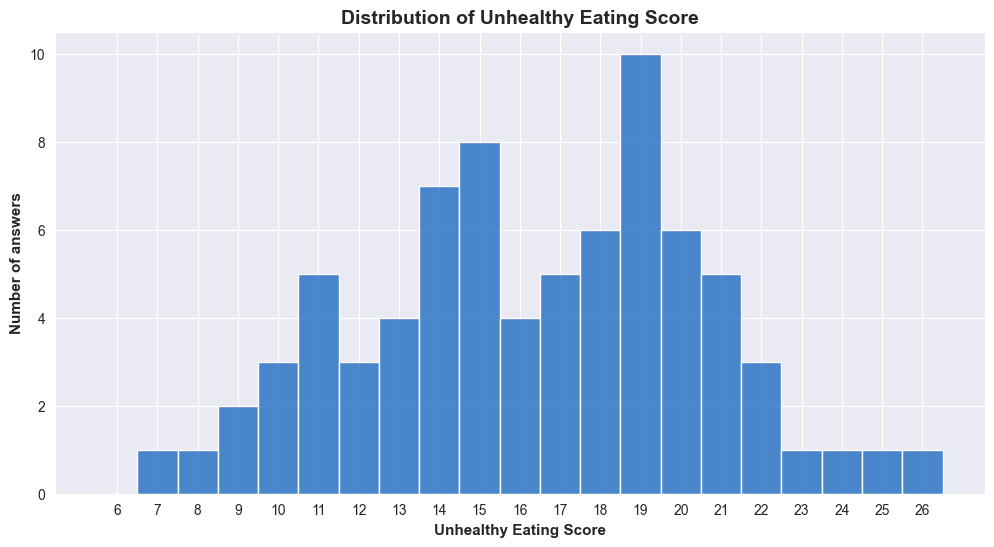

In [41]:
max_score_unhealthy = survey_data['Unhealthy_eating_score'].max()
plt.figure(figsize=(12,6))
sns.histplot(data=survey_data, x='Unhealthy_eating_score', bins=np.arange(6, max_score_unhealthy +2)-0.5, kde=False)
plt.title("Distribution of Unhealthy Eating Score", fontsize=14, weight="bold")
plt.xlabel("Unhealthy Eating Score", fontsize=11, weight="bold")
plt.xticks(range(6, max_score_unhealthy +1))
plt.ylabel("Number of answers", fontsize=11, weight="bold")
plt.show()

Many people consume unhealthy foods (sweet foods, salty foods, oily/fried foods, soft drinks, alcoholic beverages) in moderation.
The 19 score indicates that the largest group consumes these foods several times, but not necessarily escessively every day.
Low scores are few (7, 8), few people consume almost no unhealthy foods.
Very high scores (23 - 26) are also few, excessive consumption is not common, but there are some cases.

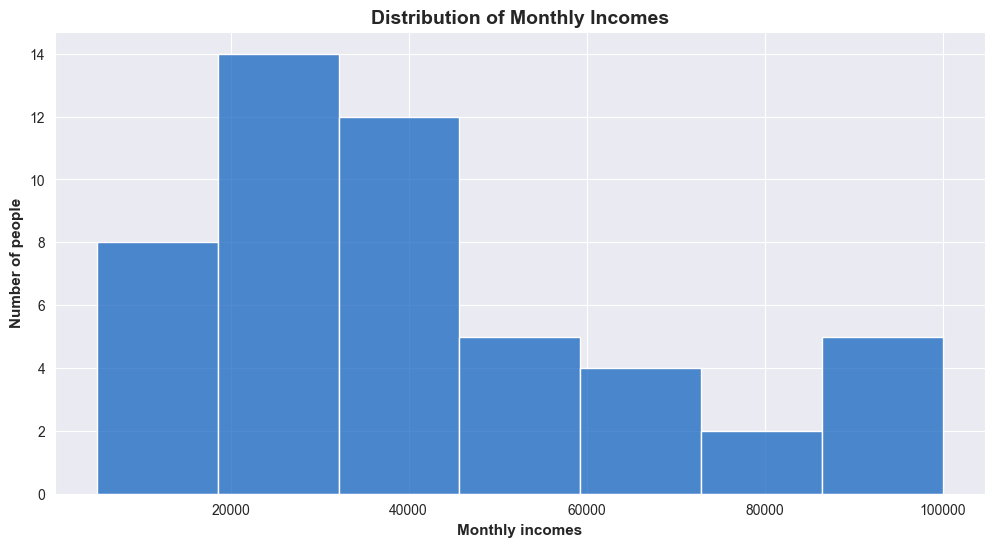

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data=income_expenditure_df, x='Mthly_HH_Income')
plt.title("Distribution of Monthly Incomes", fontsize=14, weight="bold")
plt.xlabel("Monthly incomes", fontsize=11, weight="bold")
plt.ylabel("Number of people", fontsize=11, weight="bold")
plt.show()

In [43]:
# Grouping monthly household income column
ranges_income = [5000, 23000, 35000, 50000, 100000]
names_income = ['Low', 'Medium', 'High', 'Very High']

income_expenditure_df['Group_incomes'] = pd.cut(income_expenditure_df['Mthly_HH_Income']\
                                                ,bins=ranges_income, labels=names_income, include_lowest=True)

In [44]:
incomes_group = (income_expenditure_df.groupby('Group_incomes', observed=True).size().reset_index(name='count'))
incomes_group_sort = incomes_group.sort_values('count', ascending=False)

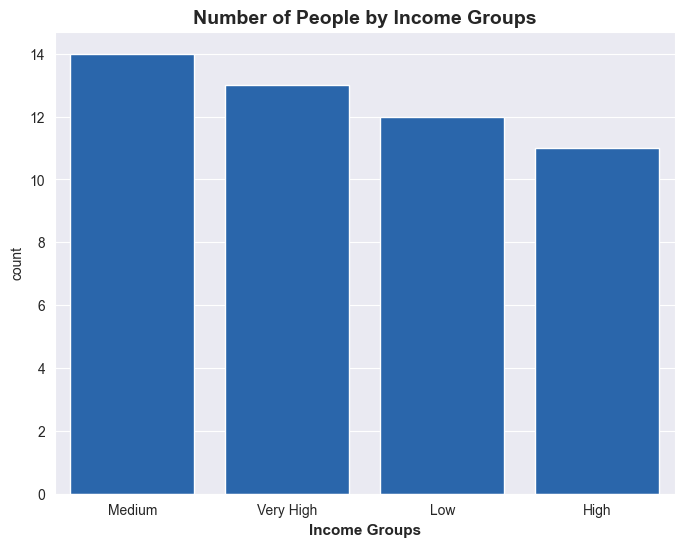

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(data=incomes_group_sort, x='Group_incomes', y='count', order=incomes_group_sort['Group_incomes'])
plt.title("Number of People by Income Groups", fontsize=14, weight="bold")
plt.xlabel("Income Groups", fontsize=11, weight="bold")
plt.show()

The mayority are in the Medium category, followed by Very High, highlighting a significant middle and upper class.
The low group is critical, because households are more vulnerable to changes in food prices.

In [46]:
# Mean of each column based on Group Incomes
incomes_summary = income_expenditure_df.groupby('Group_incomes', observed=True).agg({
    'Mthly_HH_Income': 'mean',
    'Mthly_HH_Expense': 'mean', 
    'No_of_Fly_Members': 'mean',
    'Emi_or_Rent_Amt': 'mean',
    'Annual_HH_Income': 'mean',
    'No_of_Earning_Members': 'mean'}).reset_index()
incomes_summary

,Group_incomes,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,Low,14291.666667,11541.666667,3.000000,5916.666667,173250.000000,1.166667
1,Medium,28992.857143,14885.714286,4.000000,1035.714286,347422.285714,1.357143
2,High,44272.727273,18363.636364,4.545455,954.545455,525436.363636,1.545455
3,Very High,77961.538462,30153.846154,4.692308,4384.615385,906018.461538,1.769231


##### Frecuency of consumption of Healthy foods

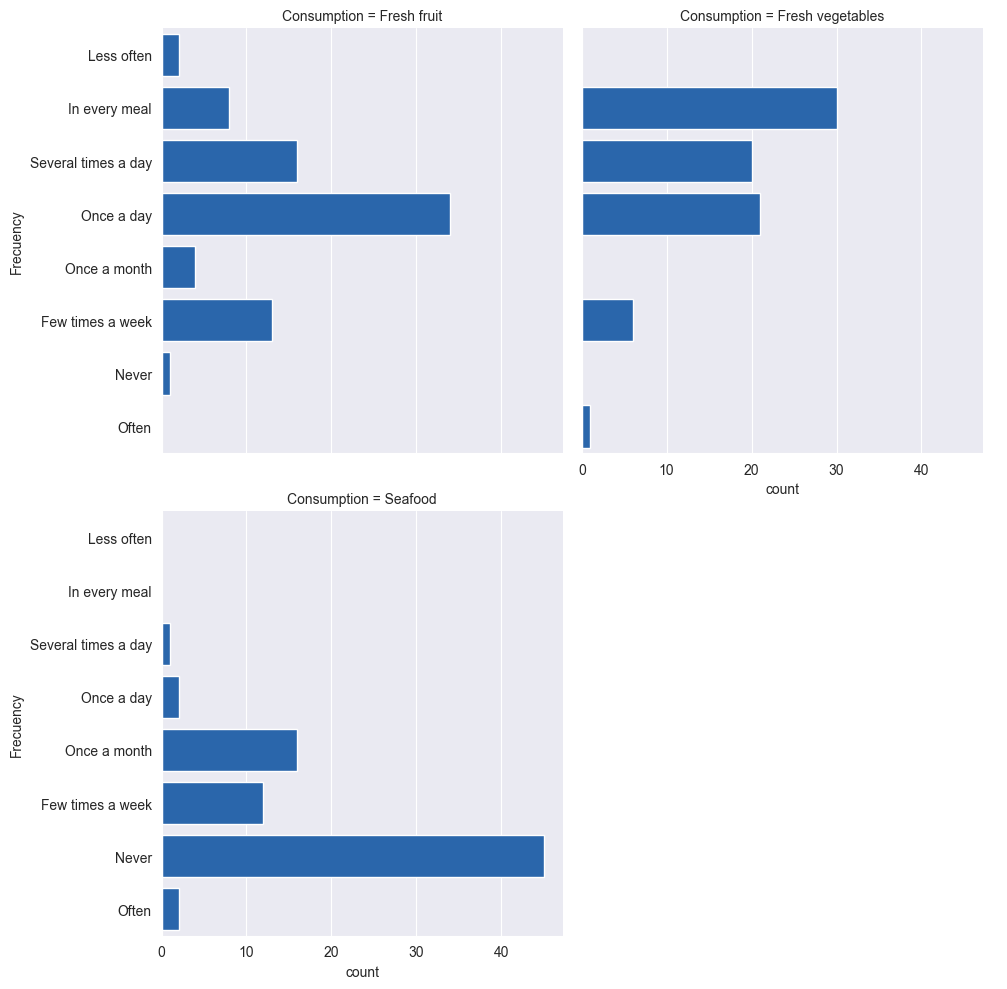

In [47]:
# Names of original columns
healthy_food = [
    'What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
    'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
    'What is your weekly food intake frequency of the following food categories: [Seafood ]']

# Change name of columns
short_names_cols = {
    healthy_food[0]: "Fresh fruit",
    healthy_food[1]: "Fresh vegetables",
    healthy_food[2]: "Seafood"}

# Transforming in long format
healthy_cols_long = dietary_habits_df.melt(value_vars= healthy_food, var_name='Consumption', value_name='Frecuency')

# Replacing long names
healthy_cols_long['Consumption'] = healthy_cols_long['Consumption'].map(short_names_cols)

# Graph by frecuency
sns.catplot(data=healthy_cols_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

The healthy diet based on fresh fruits and vegetables are consumed frecuently, even daily.
However, the low consumption of fish and seafood reflects a significant gap in the variety of healthy proteins in the diet, which may be related to economic or cultural factors.

##### Consumption of water

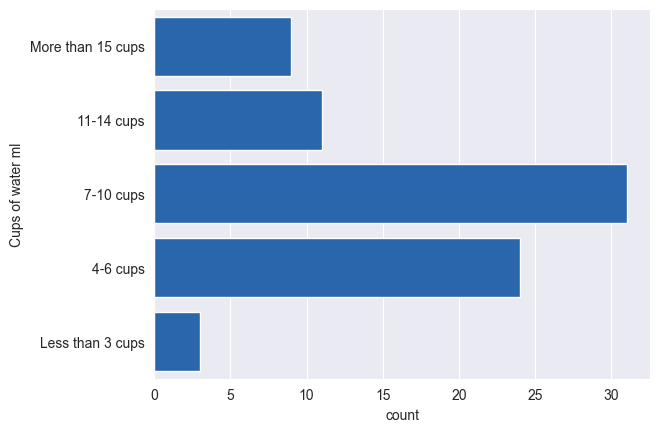

In [48]:
# Consumption of water
water_consumption = 'What is your water consumption like (in a day, 1 cup=250ml approx)'

# Change names of column
short_name_water ={water_consumption: "Water"}

# Transforming in long format
water_consumtion_long = dietary_habits_df.melt(value_vars=water_consumption, var_name="Consumption", value_name="Cups of water ml")

# Replacing long names
water_consumtion_long['Consumption'] = water_consumtion_long['Consumption'].map(short_name_water)

# Graph by frecuency
sns.countplot(data=water_consumtion_long, y='Cups of water ml')
plt.show()

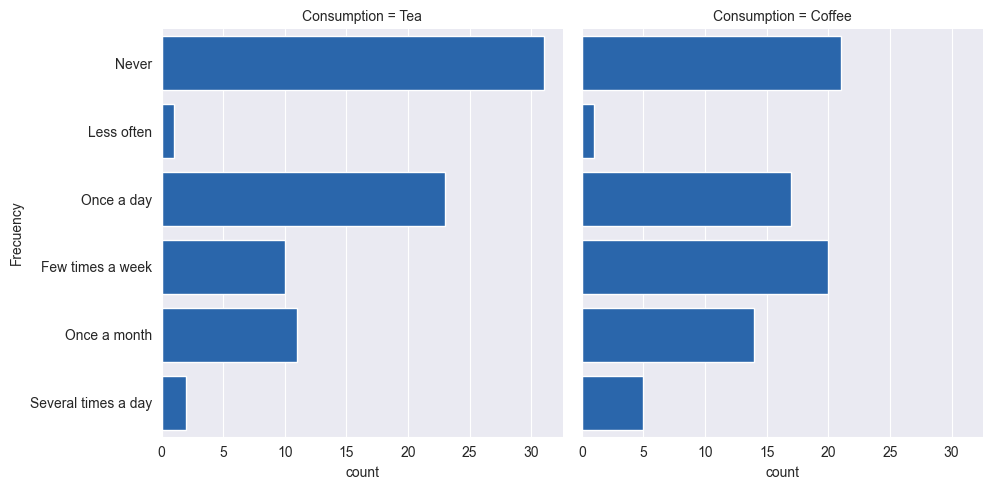

In [49]:
# Consumption of tea and coffee
beverages = ['How frequently do you consume these beverages [Tea]',
                'How frequently do you consume these beverages [Coffee]']

# Change names of columns
short_names_beverages ={
    beverages[0]: "Tea",
    beverages[1]: "Coffee"}

# Transforming in long format
beverages_long = dietary_habits_df.melt(value_vars=beverages, var_name="Consumption", value_name="Frecuency")

# Replacing long names
beverages_long['Consumption'] = beverages_long['Consumption'].map(short_names_beverages)

# Graph by frecuency
sns.catplot(data=beverages_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

##### Frecuency of consumption of Unhealthy beverages

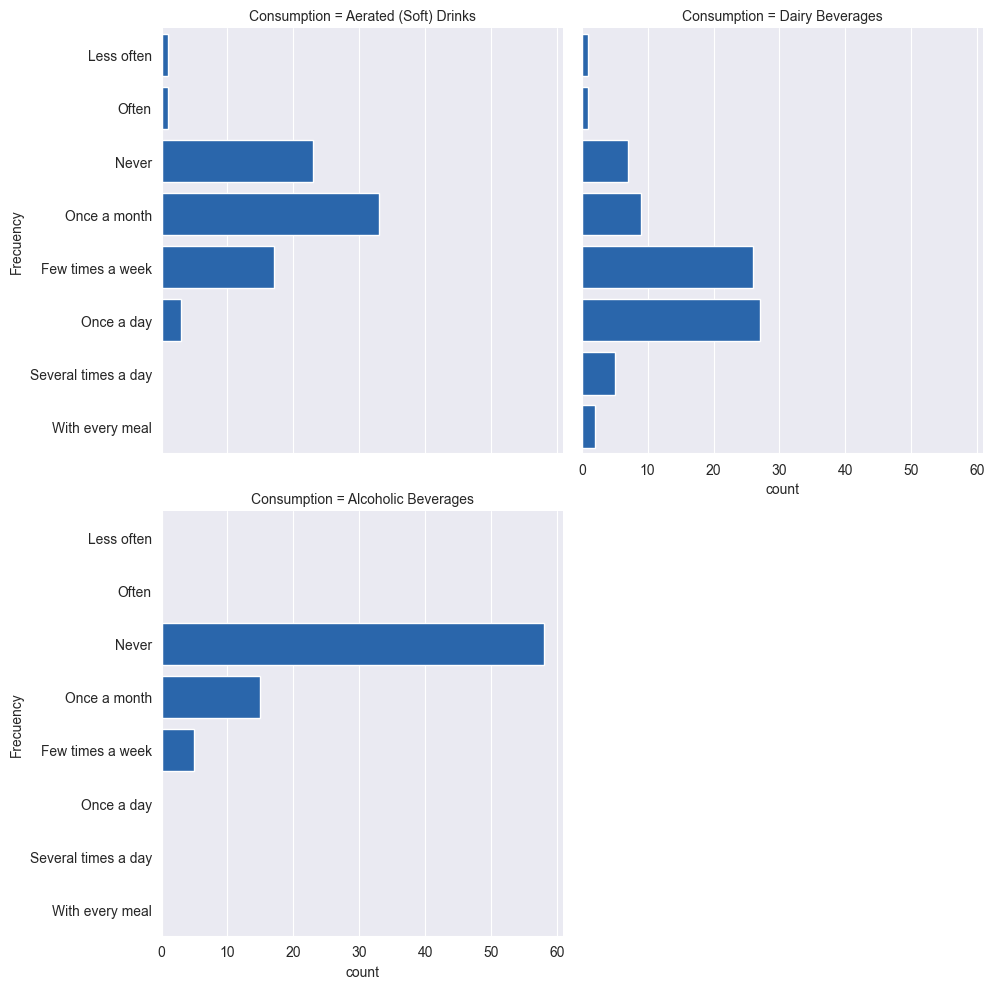

In [50]:
# Names of original columns
unhealthy_beverages = [
    'How frequently do you consume these beverages [Aerated (Soft) Drinks]',
    'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
    'How frequently do you consume these beverages [Alcoholic Beverages]']

# Change name of columns by short names
short_name_col_un = {
    unhealthy_beverages[0]: "Aerated (Soft) Drinks",
    unhealthy_beverages[1]: "Dairy Beverages",
    unhealthy_beverages[2]: "Alcoholic Beverages"}

# Transform in long format
unhealthy_beverages_long = dietary_habits_df.melt(value_vars=unhealthy_beverages, var_name='Consumption', value_name='Frecuency')

# Replacing long names
unhealthy_beverages_long['Consumption'] = unhealthy_beverages_long['Consumption'].map(short_name_col_un)

# Graph
sns.catplot(data=unhealthy_beverages_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

While consumption of soft drinks and alcohol tends to be low or sporadic, dairy drinks stand out with higher daily consumption.
This could highlight the need for nutritional education about healthier alternatives for hydration and daily consumption.

##### Frecuency of consumption of Unhealthy foods

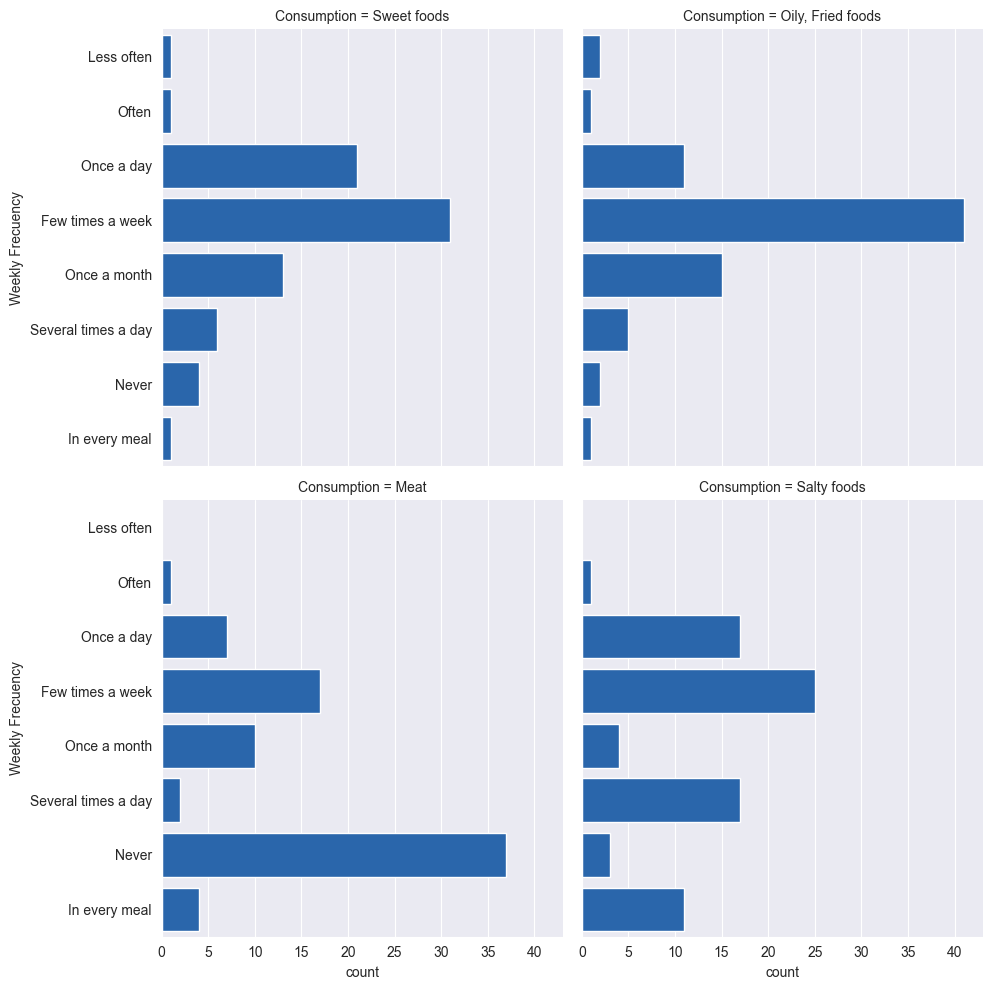

In [51]:
# Names of original columns
unhealthy_foods = [
    'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
    'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
    'What is your weekly food intake frequency of the following food categories: [Meat]',
    'What is your weekly food intake frequency of the following food categories: [Salty foods]']

# Change name of columns by short names
short_name_food = {
    unhealthy_foods[0]: "Sweet foods",
    unhealthy_foods[1]: "Oily, Fried foods",
    unhealthy_foods[2]: "Meat",
    unhealthy_foods[3]: "Salty foods"}

# Transform in long format
unhealthy_foods_long = dietary_habits_df.melt(value_vars=unhealthy_foods, var_name='Consumption', value_name='Weekly Frecuency')

# Replacing long names
unhealthy_foods_long['Consumption'] = unhealthy_foods_long['Consumption'].map(short_name_food)

# Graph
sns.catplot(data=unhealthy_foods_long, y='Weekly Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

The most common unhealthy foods in the diet are salty and sweet foods, consumed frecuently on a weekly or daily.
Fried food consumption few times a week, although still present weekly.

#### Disposable income and N° family members

In [52]:
# Create disposable income column
income_expenditure_df['disposable_income'] = income_expenditure_df['Mthly_HH_Income'] - income_expenditure_df['Mthly_HH_Expense']

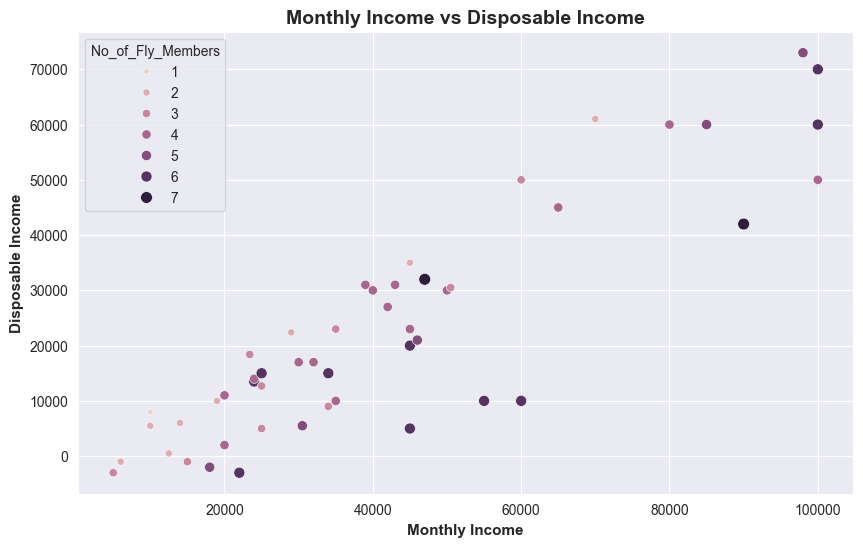

In [53]:
# Graph of income and disposable income
plt.figure(figsize=(10,6))
sns.scatterplot(data=income_expenditure_df, x='Mthly_HH_Income', y='disposable_income', hue='No_of_Fly_Members' 
                ,size='No_of_Fly_Members')
plt.title('Monthly Income vs Disposable Income', fontsize=14, weight="bold")
plt.xlabel('Monthly Income',fontsize=11, weight="bold")
plt.ylabel('Disposable Income', fontsize=11, weight="bold")
plt.show()

The graph shows that higher monthly income generally correlates with higher disposable income, as expected.
However, household size significantly affects disponsable income. Families with more members (dark dots) tend to have lower disposable income compared to smaller households with similar income levels.
This indicates that larger families face stronger financial presuure, which may limit their ability to allocate resources toward healthier food options.

#### Food prices

In [54]:
# Analyze food prices dataset
food_prices_merged = food_prices_df.merge(food_description_df, on='EFPG_code', how='left')

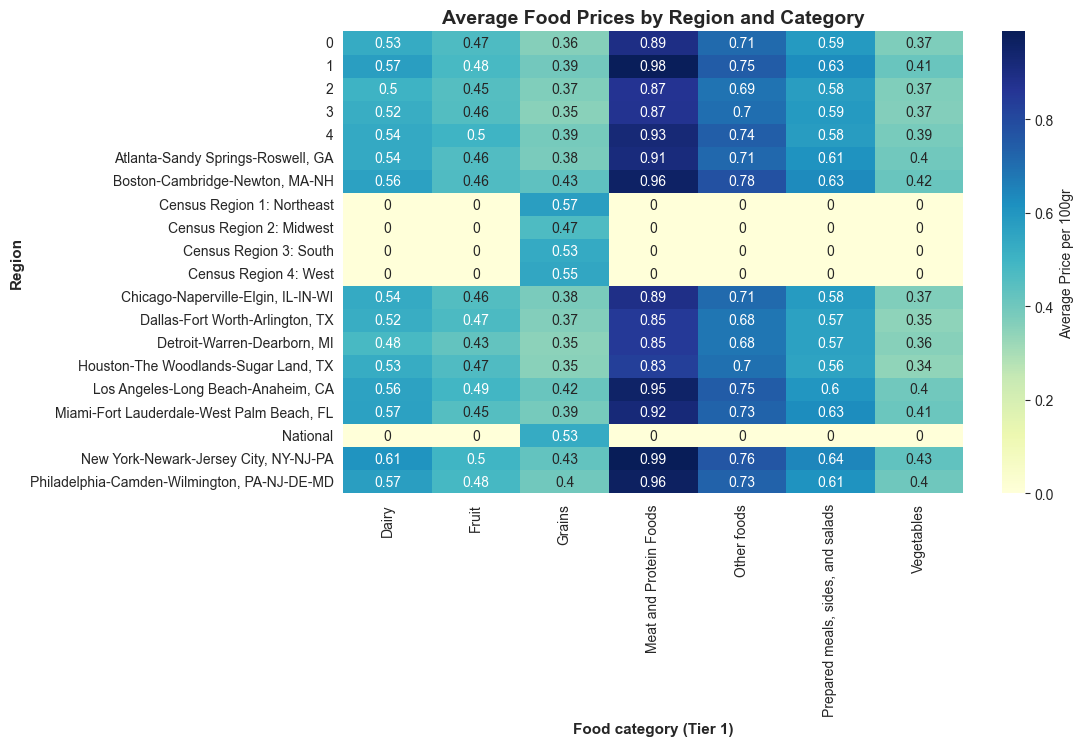

In [55]:
# Regional patterns
food_prices_100gr = food_prices_merged[food_prices_merged['Attribute'] == 'Weighted mean unit value per 100 grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()

# Pivot food prices region
food_prices_df_pivot = food_prices_100gr.pivot_table(values='Value', index='Metroregion_code', columns='Tier 1 group', fill_value=0)

# Heatmap of region by category of foods
plt.figure(figsize=(10,6))
sns.heatmap(food_prices_df_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label':'Average Price per 100gr'})
plt.title("Average Food Prices by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.show()

The heatmap highlights that Meat and Proteins Foods and Other Foods are the most expensive groups. These two categories concentrate the greatest proportion of food spending.

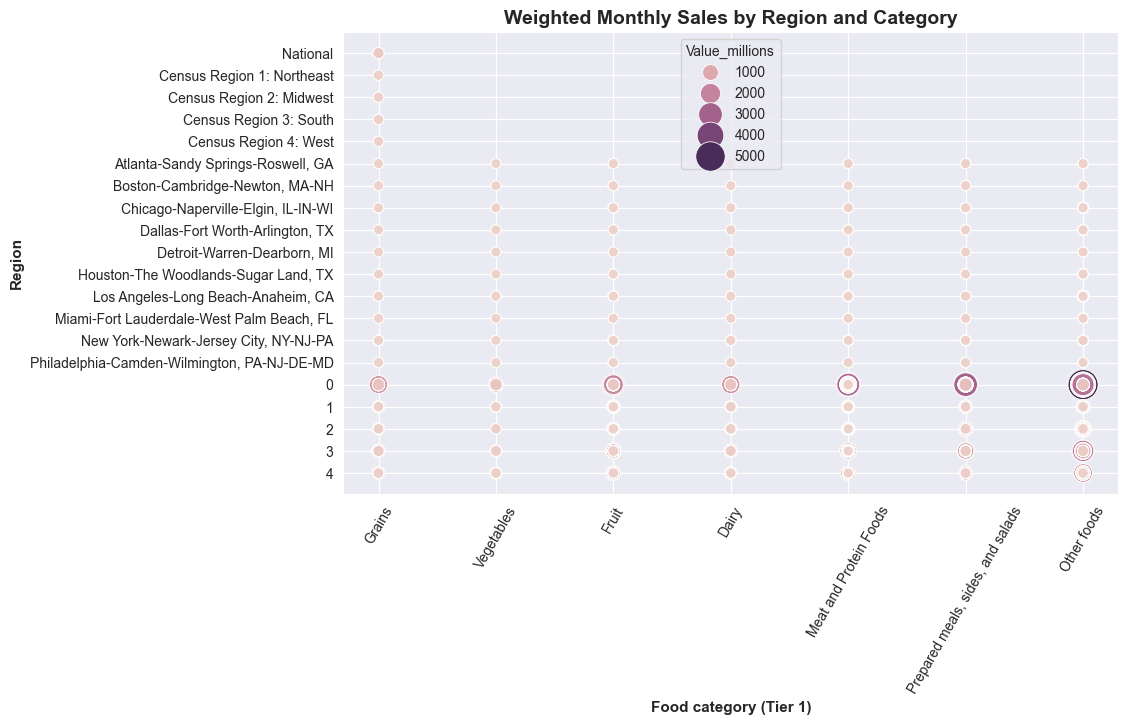

In [56]:
# Total weighted monthly sales category
food_prices_monthly_sales = food_prices_merged[food_prices_merged['Attribute'] == 'Total weighted monthly sales in U.S. dollars']
food_prices_monthly_sales_df = food_prices_monthly_sales.copy()

# Create value column in millions
food_prices_monthly_sales_df['Value_millions'] = food_prices_monthly_sales_df['Value']/1000000

# Scatterplot of region by category of foods price monthly sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=food_prices_monthly_sales_df, x='Tier 1 group', y='Metroregion_code', hue='Value_millions', size='Value_millions',\
                sizes=(50,500))
plt.title("Weighted Monthly Sales by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.xticks(rotation=60)
plt.show()

In this scatterplot, the most intense bubbles are Other foods, Prepared meals, sides, and salads, and Meat and Protein Foods, this indicates in addition to being expensive, they are highly purchased.
Households spend more on prepared meals and processed products.

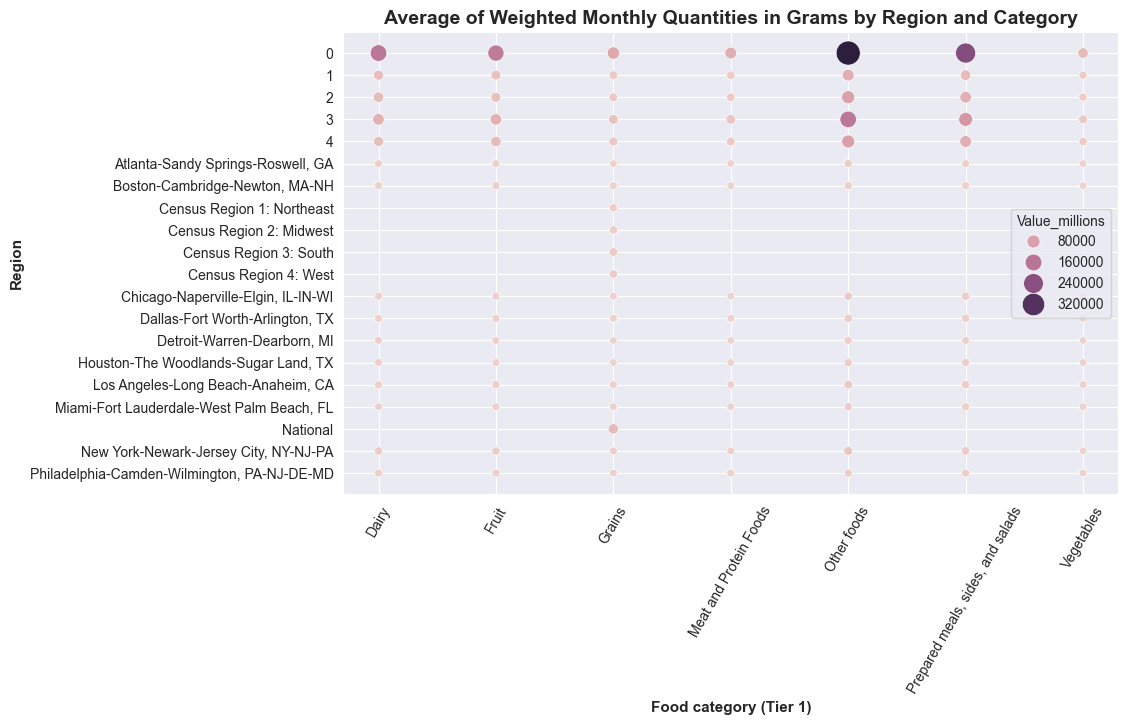

In [57]:
# Total weighted monthly quantities in grams category
food_prices_quantities = food_prices_merged[food_prices_merged['Attribute'] == 'Total weighted monthly quantities in grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
food_prices_quantities_df = food_prices_quantities.copy()

# Create value column in millions
food_prices_quantities_df['Value_millions'] = food_prices_quantities_df['Value']/1000000

# Scatterplot of region by category of foods price monthly quantities
plt.figure(figsize=(10,6))
sns.scatterplot(data=food_prices_quantities_df, x='Tier 1 group', y='Metroregion_code', hue='Value_millions', size='Value_millions',\
                sizes=(30,300))
plt.title("Average of Weighted Monthly Quantities in Grams by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.xticks(rotation=60)
plt.show()

This scatterplot confirm that families consume high volumns of Prepared meals, sides and salads, Other foods, Dairy, and Fruit. The diet leans toward ready-made meals and processed foods.

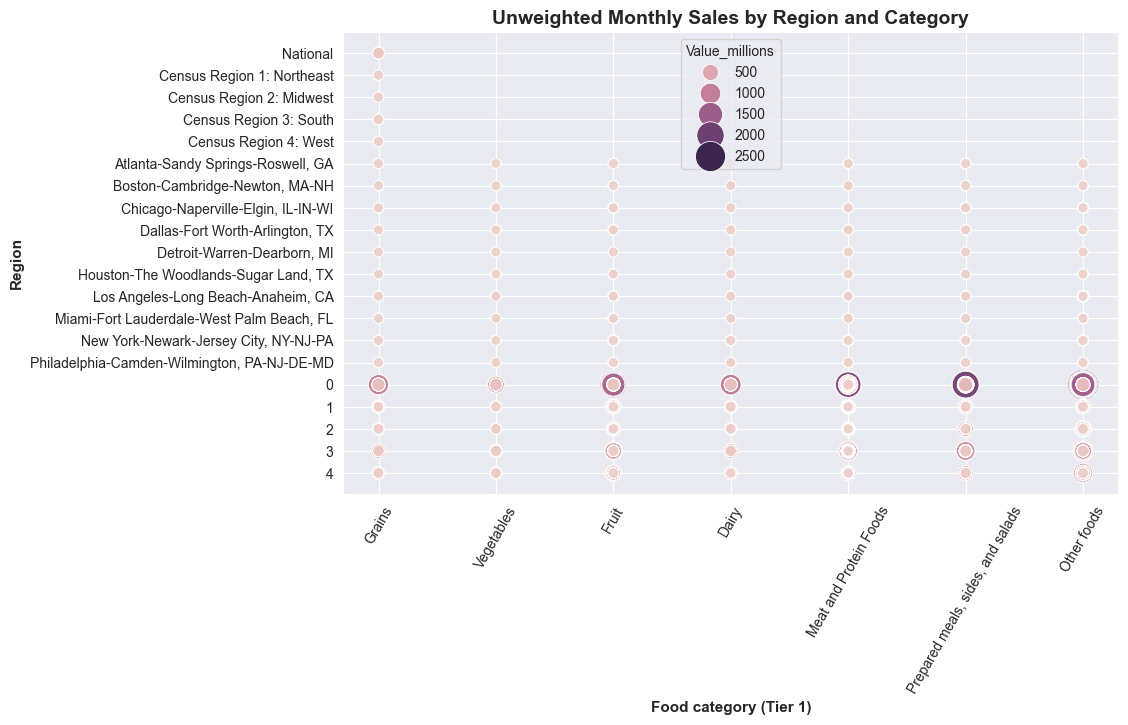

In [58]:
# Total unweighted monthly sales in U.S. dollars
food_prices_unweighted_sales = food_prices_merged[food_prices_merged['Attribute'] == 'Total unweighted monthly sales in U.S. dollars']
food_prices_unweighted_sales_df = food_prices_unweighted_sales.copy()

# Create value column in millions
food_prices_unweighted_sales_df['Value_millions'] = food_prices_unweighted_sales_df['Value']/1000000

# Scatterplot of region by category of foods price unweighted monthly sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=food_prices_unweighted_sales_df, x='Tier 1 group', y='Metroregion_code', hue='Value_millions', 
                size='Value_millions', sizes=(50,500))
plt.title("Unweighted Monthly Sales by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.xticks(rotation=60)
plt.show()

The Prepared meals, sides, and salads, Other foods and Fruit categories stand out. 

#### Foods of other foods category

In [77]:
food_prices_value_100gr = food_prices_merged[food_prices_merged['Attribute'] == 'Weighted mean unit value per 100 grams']
food_prices_value_100gr_other_foods = food_prices_value_100gr[food_prices_value_100gr['Tier 1 group']=='Other foods']
list_other_foods = food_prices_value_100gr_other_foods.groupby('Tier 2 group')['Value'].count().reset_index()
list_other_foods

,Tier 2 group,Value
0,Baby food,1260
1,Beverages,8820
2,Breakfast cereals,2520
3,"Desserts, sweets, and candies",8820
4,"Fats, oils, and salad dressings",2520
5,"Gravies, sauces, condiments, and spices",2520
6,Infant formula,1260
7,Savory snacks,2520
8,Vitamins and meal supplements,1260


#### Foods of meat and protein category

In [78]:
food_prices_value_100gr_meat_proteins = food_prices_value_100gr[food_prices_value_100gr['Tier 1 group']=='Meat and Protein Foods']
list_meat_protein_foods = food_prices_value_100gr_meat_proteins.groupby('Tier 2 group')['Value'].count().reset_index()
list_meat_protein_foods

,Tier 2 group,Value
0,"Bacon, sausage, and lunch meats",1260
1,"Beef, pork, lamb, veal and game",3780
2,"Chicken, turkey, and game birds",3780
3,Egg and egg substitutes,1260
4,Fish and seafood,3780
5,"Nuts, nut butters, and seeds",2520
6,Tofu and meat substitutes,1260


#### Foods of prepared meals, sides and salads category

In [80]:
food_prices_quantities_grams = food_prices_merged[food_prices_merged['Attribute'] == 'Total weighted monthly quantities in grams']
food_prices_quantities_meals = food_prices_quantities_grams[food_prices_quantities_grams['Tier 1 group']=='Prepared meals, sides, and salads']
list_prepared_meals = food_prices_quantities_meals.groupby('Tier 2 group')['Value'].count().reset_index()
list_prepared_meals

,Tier 2 group,Value
0,Frozen/refrigerated ready-to-heat foods,1260
1,Ready-to-eat foods,1260
2,Shelf-stable meal kits,1260
3,Shelf-stable ready-to-heat foods and soups,1260


#### Foods of fruit category

In [81]:
food_prices_unweighted_sales = food_prices_merged[food_prices_merged['Attribute'] == 'Total unweighted monthly sales in U.S. dollars']
food_prices_fruit = food_prices_unweighted_sales[food_prices_unweighted_sales['Tier 1 group'] == 'Fruit']
list_fruits = food_prices_fruit.groupby('Tier 2 group')['Value'].count().reset_index()
list_fruits

,Tier 2 group,Value
0,100% fruit and vegetable juices,3780
1,Whole fruit,6300


### Findings

- High consumption of salty and sweet foods, often on a weekly or daily basis, across all income groups.
- Higher monthly income generally correlates with higher disposable income and household size significantly affects disponsable income.
- Frequent intake of unhealthy beverages (soft drinks, alcoholic, and sugary dairy drinks), although daily consumption of soft drinks is not the majority.
- Meat and Proteins Foods and Other Foods are the most expensive groups. These two categories concentrate the greatest proportion of food spending.
- Fruits, vegetables and grains categories have a regular prices, meanwhile meat and protein, and other foods category have the highest prices.

##### What factors should policymakers target for intervention?
1. Expand educational campaigns and awareness programs highlighting the health risks of frequent consumption of salty, sugary, and fried foods.
2. Implement differentiated pricing policies or taxes to discourage excessive consumption of sugary beverages and processed snacks.
3. Strengthen programs to improve access to fresh foods in vulnerable communities, such as mobile markets or partnerships with local producers.
4. Establish monitoring systems for regional food prices and consumption patterns to identify critical areas with limited access to healthy diets.
6. Design targeted food assistance or subsidies for larger households, especially those in medium-income ranges, to ensure they can maintain access to nutritious foods despite having reduced disposable income.